In [1]:
#importing the relevant python libraries
import math
import collections
import urllib

import numpy as np
import pandas as pd
import matplotlib.pyplot as pp

%matplotlib inline


In [2]:
urllib.request.urlretrieve('https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt',
                          'readme.txt')

('readme.txt', <http.client.HTTPMessage at 0x21e23345b80>)

In [3]:
urllib.request.urlretrieve('https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/ghcnd-stations.txt',
                       'stations.txt')

('stations.txt', <http.client.HTTPMessage at 0x21e26014130>)

In [4]:
stations = np.genfromtxt('stations.txt',delimiter=[11,9,10,7,3,31,4,4,6],
                        names=['id','latitude','longitude','elevation','state','name',
                              'gsn','hcn','wmo'],
                        dtype = ['U11','d','d','d','U3','U31','U4','U4','U6'],
                        autostrip = True)

In [5]:
len(stations)

118492

In [6]:
stations

array([('ACW00011604',  17.1167, -61.7833,   10.1, '', 'ST JOHNS COOLIDGE FLD', '', '', ''),
       ('ACW00011647',  17.1333, -61.7833,   19.2, '', 'ST JOHNS', '', '', ''),
       ('AE000041196',  25.333 ,  55.517 ,   34. , '', 'SHARJAH INTER. AIRP', 'GSN', '', '41196'),
       ...,
       ('ZI000067977', -21.017 ,  31.583 ,  430. , '', 'BUFFALO RANGE', '', '', '67977'),
       ('ZI000067983', -20.2   ,  32.616 , 1132. , '', 'CHIPINGE', 'GSN', '', '67983'),
       ('ZI000067991', -22.217 ,  30.    ,  457. , '', 'BEITBRIDGE', '', '', '67991')],
      dtype=[('id', '<U11'), ('latitude', '<f8'), ('longitude', '<f8'), ('elevation', '<f8'), ('state', '<U3'), ('name', '<U31'), ('gsn', '<U4'), ('hcn', '<U4'), ('wmo', '<U6')])

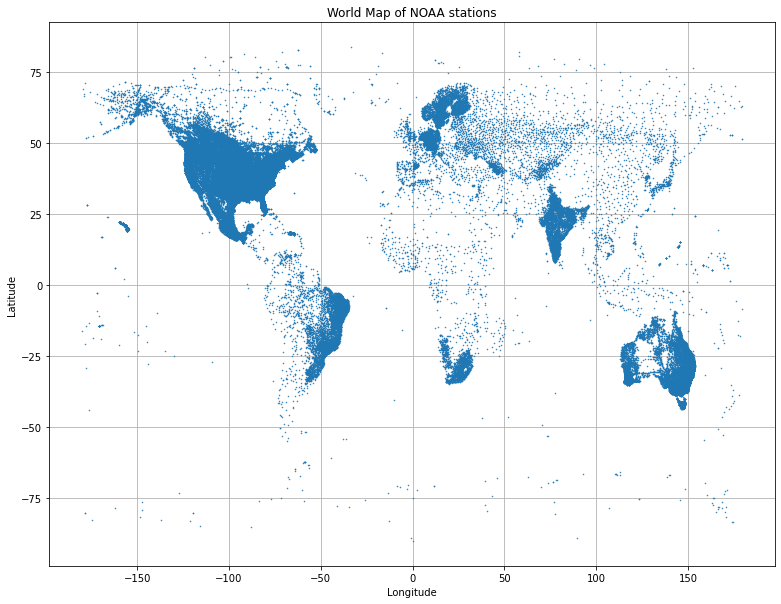

In [7]:
pp.figure(figsize=(13,10))
pp.plot(stations['longitude'],stations['latitude'],'.',markersize=1)
pp.title('World Map of NOAA stations')
pp.xlabel('Longitude')
pp.ylabel('Latitude')
pp.grid()
pp.show()

In [8]:
stations_ca = stations[stations['state']=='CA']
stat_ca = pd.DataFrame(stations_ca)
stat_ca

id  latitude  longitude  elevation state  \
0     US1CAAL0001   37.8123  -122.2160      113.4    CA   
1     US1CAAL0002   37.7075  -122.0687       87.5    CA   
2     US1CAAL0003   37.7169  -122.0585      163.4    CA   
3     US1CAAL0004   37.6483  -121.8745      107.0    CA   
4     US1CAAL0006   37.8319  -122.2503       58.2    CA   
...           ...       ...        ...        ...   ...   
2874  USW00093241   38.3775  -121.9575       33.2    CA   
2875  USW00093242   36.9878  -120.1106       77.1    CA   
2876  USW00093243   37.2381  -120.8825       23.8    CA   
2877  USW00093245   38.3208  -123.0747       19.2    CA   
2878  USW00094299   41.4914  -120.5644     1333.5    CA   

                       name gsn hcn    wmo  
0           PIEDMONT 1.0 SE                 
1     CASTRO VALLEY 0.5 WSW                 
2     CASTRO VALLEY 0.4 NNE                 
3        PLEASANTON 1.8 SSE                 
4           OAKLAND 4.4 NNW                 
...                     ...  ..  ..    ...  
2874  VACAVILLE NUT TREE AP                 
2875         MADERA MUNI AP                 
2876          MERCED 23 WSW          74507  
2877           BODEGA 6 WSW          74518  
2878        ALTURAS MUNI AP                 

[2879 rows x 9 columns]

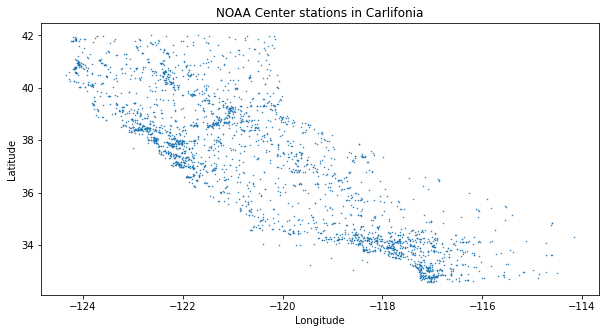

In [14]:
#Plotting all the stations in Carlifonia
pp.figure(figsize=(10,5))
pp.plot(stations_ca['longitude'],stations_ca['latitude'],'.',markersize = 1)
pp.title('NOAA Center stations in Carlifonia')
pp.xlabel('Longitude')
pp.ylabel('Latitude')
#pp.grid()
pp.show()

In [10]:
#Finding all stations at a given elevation
stat_ca[stat_ca['elevation'] == 33.2]

id  latitude  longitude  elevation state  \
507   US1CAOR0070   33.5007  -117.6685       33.2    CA   
555   US1CARV0033   33.7711  -116.3010       33.2    CA   
581   US1CASA0006   38.6375  -121.3446       33.2    CA   
623   US1CASC0001   37.3848  -122.0752       33.2    CA   
2874  USW00093241   38.3775  -121.9575       33.2    CA   

                           name gsn hcn wmo  
507   SAN JUAN CAPISTRANO 0.9 W              
555         PALM DESERT 5.0 ENE              
581            CARMICHAEL 1.4 W              
623         MOUNTAIN VIEW 1.2 S              
2874      VACAVILLE NUT TREE AP

In [11]:
stations[stations['name'] == 'PASADENA']

array([('USC00046719', 34.1483, -118.1447, 263.3, 'CA', 'PASADENA', '', 'HCN', '')],
      dtype=[('id', '<U11'), ('latitude', '<f8'), ('longitude', '<f8'), ('elevation', '<f8'), ('state', '<U3'), ('name', '<U31'), ('gsn', '<U4'), ('hcn', '<U4'), ('wmo', '<U6')])

In [12]:
#To find stations with the name pasadena from the world map stations
stations[np.char.find(stations['name'],'PASADENA') == 0]

array([('CA1NL000026', 49.0094,  -57.5849,  52.4, 'NL', 'PASADENA 0.5 SE', '', '', ''),
       ('US1CALA0036', 34.1392, -118.1161, 225.2, 'CA', 'PASADENA 2.0 SE', '', '', ''),
       ('US1CALA0043', 34.1619, -118.1073, 277.7, 'CA', 'PASADENA 1.8 E', '', '', ''),
       ('US1CALA0091', 34.1648, -118.1249, 289. , 'CA', 'PASADENA 0.8 ENE', '', '', ''),
       ('US1MDAA0010', 39.1038,  -76.5443,  13.1, 'MD', 'PASADENA 0.7 SE', '', '', ''),
       ('US1MDAA0013', 39.1263,  -76.5596,  18.9, 'MD', 'PASADENA 1.1 NNW', '', '', ''),
       ('US1MDAA0039', 39.0916,  -76.5112,  10.7, 'MD', 'PASADENA 2.6 ESE', '', '', ''),
       ('US1TXHRR076', 29.6471,  -95.1895,  10.7, 'TX', 'PASADENA 2.4 WSW', '', '', ''),
       ('US1TXHRR084', 29.6339,  -95.1881,  11.9, 'TX', 'PASADENA 2.8 SW', '', '', ''),
       ('US1TXHRR093', 29.6849,  -95.2197,   9.1, 'TX', 'PASADENA 4.4 WNW', '', '', ''),
       ('US1TXHRR094', 29.6746,  -95.2104,   9.1, 'TX', 'PASADENA 3.6 WNW', '', '', ''),
       ('USC00046719', 34.1

In [15]:
urllib.request.urlretrieve('https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/all/USC00046719.dly',
                          'PASADENA.dly')

('PASADENA.dly', <http.client.HTTPMessage at 0x21e296d6c10>)

In [17]:
import getweather

In [18]:
help(getweather.getyear)  #docstring

Help on function getyear in module getweather:

getyear(station_name, elements, year)
    Make a NumPy record array of length 365, containing weather data
    at station_name for the list of requested elements (TMIN/TMAX/PRCP/SNOW),
    restricted to year.
    
    If station_name is not in the list, find a station that _begins_
    with station_name, but give precedence to HCN and GSN stations.



# EOD